In [49]:
# imports

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# view data
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Q1. Do smokers have higher insurance charges than non-smokers?




* **Null hypothesis**: There is no difference for insurance charges between smokers and non smokers


* **Alternate hypothesis**: There is a difference for insurance charges between smokers and non smokers

* The Alpha is set to .05

* Determining test
    * data type?: numeric
    * number of groups?: 2
    * What test is appropriate?: T-Test


In [4]:
#check smoker info
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [5]:
#seperating groups
df['smokers'] = df['smoker'].str.contains('yes')
df['smokers'].value_counts()

False    1064
True      274
Name: smokers, dtype: int64

In [6]:
#save list of columns
cols = ['charges','smokers']
df[cols]

,charges,smokers
0,16884.92400,True
1,1725.55230,False
2,4449.46200,False
3,21984.47061,False
4,3866.85520,False
...,...,...
1333,10600.54830,False
1334,2205.98080,False
1335,1629.83350,False
1336,2007.94500,False


In [7]:
#save smoker group as 1 variable
smoker_df = df.loc[df['smokers']==True, cols]
smoker_df

,charges,smokers
0,16884.92400,True
11,27808.72510,True
14,39611.75770,True
19,36837.46700,True
23,37701.87680,True
...,...,...
1313,36397.57600,True
1314,18765.87545,True
1321,28101.33305,True
1323,43896.37630,True


In [8]:
non_smoker_df = df.loc[df['smokers']==False,cols]
non_smoker_df

,charges,smokers
1,1725.55230,False
2,4449.46200,False
3,21984.47061,False
4,3866.85520,False
5,3756.62160,False
...,...,...
1332,11411.68500,False
1333,10600.54830,False
1334,2205.98080,False
1335,1629.83350,False


In [9]:
# getting data to plot
plot_df = pd.concat([smoker_df,non_smoker_df])
plot_df

,charges,smokers
0,16884.9240,True
11,27808.7251,True
14,39611.7577,True
19,36837.4670,True
23,37701.8768,True
...,...,...
1332,11411.6850,False
1333,10600.5483,False
1334,2205.9808,False
1335,1629.8335,False


<AxesSubplot:xlabel='smokers', ylabel='charges'>

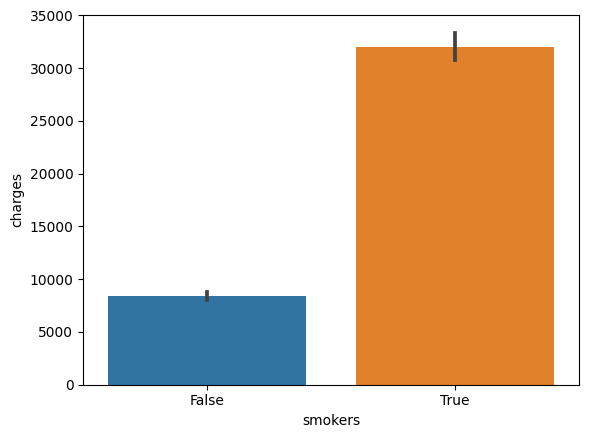

In [10]:
#plotting data
sns.barplot(data = plot_df, x = 'smokers', y= 'charges')

according to this smokers pay more insurance charges

In [11]:
#saving numeric values as final group variables
smokeing_group =  smoker_df['charges']
non_smokeing_group = non_smoker_df['charges']
smokeing_group

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [12]:
# check for outliers among smokers
smokeing_group_outliers = np.abs(stats.zscore(smokeing_group))>3
smokeing_group_outliers.value_counts()

False    274
Name: charges, dtype: int64

No outliers are present in our smoking group

In [13]:
#checking for outliers among the non smokers
non_smokeing_group_outliers = np.abs(stats.zscore(non_smokeing_group))>3
non_smokeing_group_outliers.value_counts()

False    1040
True       24
Name: charges, dtype: int64

In [14]:
# removing outliers from non smokers
non_smokeing_group= non_smokeing_group[~non_smokeing_group_outliers]

 ## checking for normality

In [15]:
results = stats.normaltest(smokeing_group)
results

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [16]:
results = stats.normaltest(non_smokeing_group)
results

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

The pvalues for both groups are less than the alpha. 

## equal variance testing

In [17]:
stats.levene(smokeing_group, non_smokeing_group)

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

The test for equal variance has failed, performing  a final test.


In [18]:
results = stats.ttest_ind(smokeing_group, non_smokeing_group, equal_var = False)
results

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)

All results are less than the alpha

In [19]:
#calculating group means
print('smokers averaged:',smokeing_group.mean())
print('non smokers averaged:',non_smokeing_group.mean())

smokers averaged: 32050.23183153284
non smokers averaged: 7939.8608446721155


## final conclusion

All results are less than the alpha. we reject the null hypothesis. Smokers will pay significantly more in charges than non smokers(remember that when you go to the hospital ;) )

# Q2. Are men more likely to smoke than women?

* **Null Hypothesis:** Men are not more likely to smoke then women
* **Alternative Hypothesis** Men are more likely to smoke than women

* Determining test
    * data type?: categorical
    * number of groups?: 2
    * What test is appropriate?: Chi-Square
* The alpha is set to .05    

In [20]:
# check gender info
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [21]:
#seperating groups
df['female'] = df['sex'].str.contains('female')
df['female'].value_counts()

False    676
True     662
Name: female, dtype: int64

In [22]:
#save list of columns
cols = ['female','smoker']
df[cols]

,female,smoker
0,True,yes
1,False,no
2,False,no
3,False,no
4,False,no
...,...,...
1333,False,no
1334,True,no
1335,True,no
1336,True,no


In [23]:
#save female group as  variable
female_df = df.loc[df['female']==True, cols]
female_df

,female,smoker
0,True,yes
5,True,no
6,True,no
7,True,no
9,True,no
...,...,...
1332,True,no
1334,True,no
1335,True,no
1336,True,no


In [24]:
# save male group as vairable
male_df = df.loc[df['female']==False, cols]
male_df

,female,smoker
1,False,no
2,False,no
3,False,no
4,False,no
8,False,no
...,...,...
1324,False,no
1325,False,no
1327,False,no
1329,False,no


In [25]:
# getting data to plot
plot_df = pd.concat([female_df,male_df])
plot_df

,female,smoker
0,True,yes
5,True,no
6,True,no
7,True,no
9,True,no
...,...,...
1324,False,no
1325,False,no
1327,False,no
1329,False,no


<AxesSubplot:xlabel='smoker', ylabel='female'>

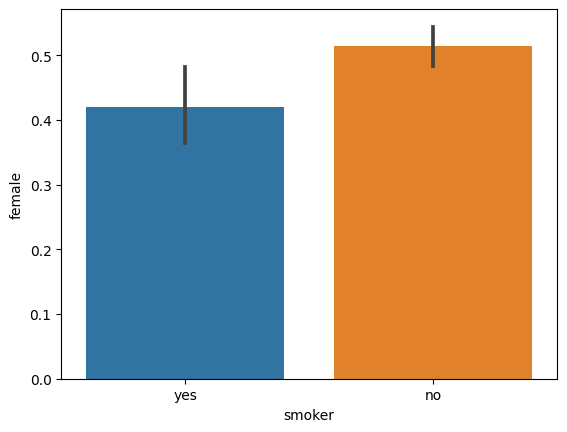

In [27]:
#plotting data
sns.barplot(data = plot_df, x = 'smoker', y= 'female')

about 40% of smokers in this group are female.

In [28]:
# saving categorical values as final group variables
female_group =  female_df['smoker']
male_group = male_df['smoker']
male_group

1       no
2       no
3       no
4       no
8       no
        ..
1324    no
1325    no
1327    no
1329    no
1333    no
Name: smoker, Length: 676, dtype: object

In [29]:
female_group

0       yes
5        no
6        no
7        no
9        no
       ... 
1332     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 662, dtype: object

In [33]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table



smoker,no,yes
sex,,
female,547,115
male,517,159


there are more male smokers in this table

In [35]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

# What was our p-value?
print(p)
p<.05



0.006548143503580696


True

## Conclusion

our p value is less than 5%, we have a significant result and can reject the null hypothesis and confirm that men are more likely to smoke than women. 

# - Q3. Do different regions have different charges, on average?

* **Null Hypothesis:** There are is NOT a significant diffence in charges based off region
* **Alternative Hypothesis:** There IS a significant differenc in charges based off region

In [36]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

* Determining test
    * data type?: numerical
    * number of groups?: 4
    * What test is appropriate?: ANOVA and/or Tukey
* The alpha is set to .05

In [37]:
#seperating groups
df['se_region'] = df['region'].str.contains('southeast')
df['sw_region'] = df['region'].str.contains('southwest')
df['nw_region'] = df['region'].str.contains('northwest')
df['ne_region'] = df['region'].str.contains('northeast')
df['ne_region'].value_counts()

False    1014
True      324
Name: ne_region, dtype: int64

In [38]:
#save list of columns
cols = ['region','charges']
df[cols]

,region,charges
0,southwest,16884.92400
1,southeast,1725.55230
2,southeast,4449.46200
3,northwest,21984.47061
4,northwest,3866.85520
...,...,...
1333,northwest,10600.54830
1334,northeast,2205.98080
1335,southeast,1629.83350
1336,southwest,2007.94500


In [39]:
#save groups as a variable
se_df = df.loc[df['se_region']==True, cols]
sw_df = df.loc[df['sw_region']==True, cols]
ne_df = df.loc[df['ne_region']==True, cols]
nw_df = df.loc[df['nw_region']==True, cols]
ne_df

,region,charges
8,northeast,6406.41070
10,northeast,2721.32080
16,northeast,10797.33620
17,northeast,2395.17155
20,northeast,13228.84695
...,...,...
1321,northeast,28101.33305
1325,northeast,13143.33665
1326,northeast,7050.02130
1328,northeast,22395.74424


In [40]:
# getting data to plot
plot_df = pd.concat([se_df,sw_df,ne_df,nw_df])
plot_df

,region,charges
1,southeast,1725.55230
2,southeast,4449.46200
5,southeast,3756.62160
6,southeast,8240.58960
11,southeast,27808.72510
...,...,...
1319,northwest,7201.70085
1320,northwest,5425.02335
1324,northwest,4239.89265
1333,northwest,10600.54830


<AxesSubplot:xlabel='region', ylabel='charges'>

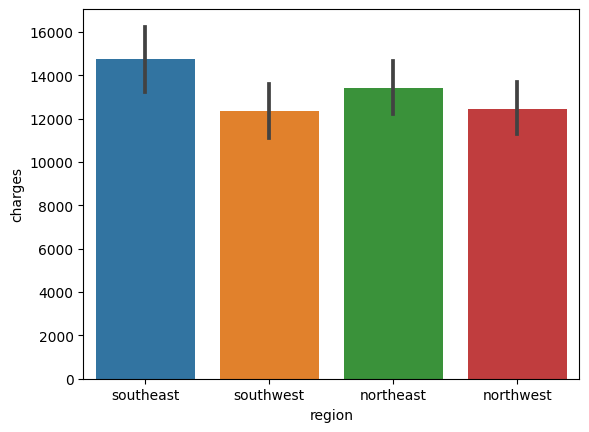

In [41]:
#plotting data
sns.barplot(data = plot_df, x = 'region', y= 'charges')

it appears there is indeed a difference in charges between region, the west seems to pay less

In [43]:
## Create groups dictionary. There are 4 groups
groups = {}
## Loop through all unique categories
for r in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==r,'charges'].copy()
    
    # save into the dictionary
    groups[r] = data
groups.keys()



dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

## Testing Assumptions


In [45]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for r, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[r] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df


,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


our pvalues are less than 5%, meaning we can reject the null hypothesis

## Testing Assumption of Equal Variance


In [47]:
# getting levene stats with the * operator 
stats.levene(*groups.values())


LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

In [48]:
# perform  hypothesis test
result = stats.f_oneway( *groups.values())
result



F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

we have a significant result for our hypothesis test

In [55]:
# determining which groups were different
## save the values as charges and the labels to the region
values = df['charges']
labels = df['region']

## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()



group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True


there is a significant difference between the southeast and southwest

## Conclusion

We can reject the null hypothesis that there is no difference between region and insurance charges. The southeast and southwest had the most significant differences and your more likely to pay less in the west